In [1]:
from tqst_class import *

In [2]:
tomo = tQST(4)
nq = tomo.get_num_of_qubits()
print(nq)
N=nq**2

diagonal_ideal = np.zeros(N)
diagonal_ideal[0]=1/4
diagonal_ideal[3]=1/4
diagonal_ideal[12]=1/4
diagonal_ideal[15]=1/4
print(diagonal_ideal)
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal_ideal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal_ideal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 4.
4
[0.25 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.
 0.   0.25]
Diagonal counts are now set.
The threshold is now set to 0.05.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 12, 'r')  |   |DDHH>  |
|  (0, 12, 'i')  |   |DRHH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (3, 12, 'r')  |   |DRDR>  |
|  (3, 12, 'i')  |   |DRDD>  |
|  (3, 15, 'r')  |   |DDVV>  |
|  (3, 15, 'i')  |   |DRVV>  |
| (12, 15, 'r')  |   |VVDD>  |
| (12, 15, 'i')  |   |VVDR>  |
+----------------+-----------+
nb of measurement necessary:  (12,)


### Get diagonal counts

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_14260\1719778049.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename_diag='\Tomo_18Dic_Diag_Diego'


Loading...  \Tomo_18Dic_Diag_Diego
Sorted Binary Strings: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
Original Indexes: [0, 8, 12, 4, 1, 9, 13, 5, 2, 10, 14, 6, 3, 11, 15, 7]
original coinc: [' 276.0' ' 0.0' ' 2.0' ' 214.0' ' 157.0' ' 0.0' ' 0.0' ' 162.0' ' 0.0'
 ' 0.0' ' 0.0' ' 5.0' ' 1.0' ' 7.0' ' 1.0' ' 0.0']
diag_coinc, ordered: [' 276.0' ' 0.0' ' 1.0' ' 157.0' ' 0.0' ' 0.0' ' 7.0' ' 0.0' ' 2.0' ' 0.0'
 ' 1.0' ' 0.0' ' 214.0' ' 5.0' ' 0.0' ' 162.0']
Type time-bin, ordered: [' 00' ' 00' ' 00' ' 00' ' 01' ' 01' ' 01' ' 01' ' 10' ' 10' ' 10' ' 10'
 ' 11' ' 11' ' 11' ' 11']
Type freq-bin, ordered: [' 00' ' 01' ' 10' ' 11' ' 00' ' 01' ' 10' ' 11' ' 00' ' 01' ' 10' ' 11'
 ' 00' ' 01' ' 10' ' 11']


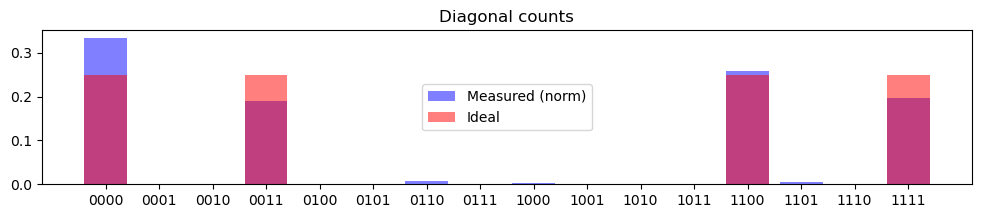

In [3]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename_diag='\Tomo_18Dic_Diag_Diego'
fpath=DIR+folder+filename_diag


print("Loading... ", filename_diag)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)

binary_strings=data[:,0]
coinc=data[:,1]
diag_type_TB=data[:,6]
diag_type_FB=data[:,9]

## Order the binary data
indexed_binary_strings = enumerate(binary_strings)
sorted_with_indexes = sorted(indexed_binary_strings, key=lambda x: int(x[1], 2))

# Extract sorted strings and their original indexes
sorted_strings = [x[1] for x in sorted_with_indexes]
sorted_indexes = [x[0] for x in sorted_with_indexes]

diag_coinc=coinc[sorted_indexes]
diag_type_TB=diag_type_TB[sorted_indexes]
diag_type_FB=diag_type_FB[sorted_indexes]

print("Sorted Binary Strings:", sorted_strings)
print("Original Indexes:", sorted_indexes)
print("original coinc:", coinc)
print("diag_coinc, ordered:", diag_coinc)
print("Type time-bin, ordered:", diag_type_TB)
print("Type freq-bin, ordered:", diag_type_FB)

# Convert each string to a float
diag_coinc_arr = [float(x) for x in diag_coinc]
# tomo.set_diagonal_counts(diag_coinc_arr)

fig, ax= plt.subplots(figsize=(12, 2), ncols=1, nrows=1)
ax.bar(sorted_strings,diag_coinc_arr/np.sum(diag_coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
ax.bar(sorted_strings,diagonal_ideal, label='Ideal', color='red', alpha=0.5)
ax.set_title("Diagonal counts")
ax.legend(loc='center')


In [88]:
## if you want to calculate again the projector with the measured diagonal elements

gini = dmt.gini_index(diag_coinc_arr)
# threshold = tomo.set_threshold(gini)
threshold=0.1

offd_projs = tomo.get_projs_to_measure()

These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 6, 'r')   |   |HDDH>  |
|  (0, 6, 'i')   |   |HDRH>  |
|  (0, 12, 'r')  |   |DDHH>  |
|  (0, 12, 'i')  |   |DRHH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (3, 12, 'r')  |   |DRDR>  |
|  (3, 12, 'i')  |   |DRDD>  |
|  (3, 15, 'r')  |   |DDVV>  |
|  (3, 15, 'i')  |   |DRVV>  |
| (12, 15, 'r')  |   |VVDD>  |
| (12, 15, 'i')  |   |VVDR>  |
+----------------+-----------+


### Get counts for the measured projectors

In [ ]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename='\Tomo_18Dic_all_Diego'
fpath=DIR+folder+filename

### Proj_ideal, Coinc, ph_s0, ph_i0, ph_s1, ph_i1, type_tb, ph_RF_s, ph_RF_i, type_fb
print("Loading... ", filename)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)
settings_TB=np.zeros([4,len(data)])
settings_FB=np.zeros([2,len(data)])

proj_name=data[:,0]
print(proj_name)
coinc=data[:,1]
settings_TB[0,:]=data[:,2]
settings_TB[1,]=data[:,3]
settings_TB[2,:]=data[:,4]
settings_TB[3,:]=data[:,5]
type_TB=data[:,6]
settings_FB[0,:]=data[:,7]
settings_FB[1,:]=data[:,8]
settings_FB=np.deg2rad(settings_FB)
type_FB=data[:,9]
# Convert each string to a float
coinc_arr = np.asarray([float(x) for x in coinc])
print(coinc_arr)

Loading...  \Tomo_18Dic_all_Diego
['HHDD' 'HHDR' 'DDHH' 'DRHH' 'DDDD' 'DDDR' 'DRDR' 'DRDD' 'VVDD' 'VVDR'
 'DDVV' 'DRVV']
[ 50.  20. 982. 544. 238.  77.  50. 152.  55.  18. 521. 472.]


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_14260\403694457.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename='\Tomo_18Dic_all_Diego'


## Rho with measured counts & ideal projectors
### First method (need normalization)

Diagonal counts are now set.
(28, 16)
The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


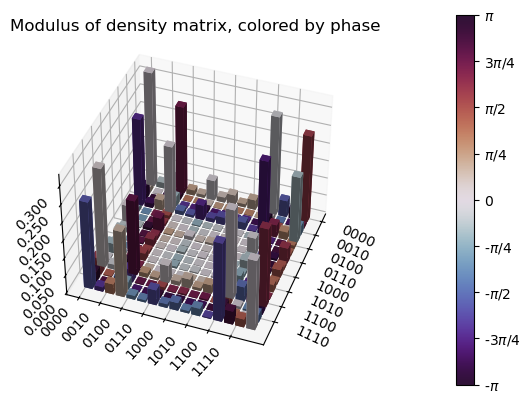

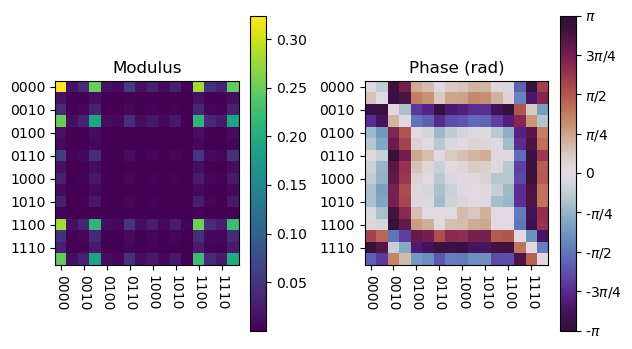

In [5]:
# coinc_arr.transpose()
# proj_name.transpose()
tomo.set_diagonal_counts(diag_coinc_arr/np.sum(diag_coinc_arr))
tomo.set_projs_and_counts(proj_name, coinc_arr/np.sum(coinc_arr))
projs, counts = tomo.get_projs_and_counts()
print(np.shape(projs))
# print(np.shape(counts))
# print(counts)
#####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)
dmt.plot_density_matrix_2D(rho_rec)

(28,)
HHHH
(0.324540109116965+0j) 0.33454545454545453
HHHV
(0.0008253483159306823+0j) 0.0
HHVH
(0.0047719977677591644+0j) 0.0012121212121212121
HHVV
(0.191077468623599+0j) 0.1903030303030303
HVHH
(0.0006797401224338296+0j) 0.0
HVHV
(0.0002414081845730434+0j) 0.0
HVVH
(0.010579844423866579+0j) 0.008484848484848486
HVVV
(0.0006556177756826605+0j) 0.0
VHHH
(0.0030374169242921192+0j) 0.0024242424242424242
VHHV
(0.00028956443889106224+0j) 0.0
VHVH
(0.0025208860452575026+0j) 0.0012121212121212121
VHVV
(0.00010729485599216656+0j) 0.0
VVHH
(0.25245411665684+0j) 0.2593939393939394
VVHV
(0.007427864663618747+0j) 0.006060606060606061
VVVH
(0.0027907199688833486+0j) 0.0
VVVV
(0.19800060211541506+0j) 0.19636363636363635
HHDD
(0.03919617790762916+0j) 0.015728216420257943
HHDR
(0.1844319394199253+0j) 0.0062912865681031774
DDHH
(0.31829276884614655+1.734723475976807e-18j) 0.308902170493866
DRHH
(0.13761334793397528+0j) 0.1711229946524064
DDDD
(0.06774233297273077-6.938893903907228e-18j) 0.074866310160

c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


<BarContainer object of 12 artists>

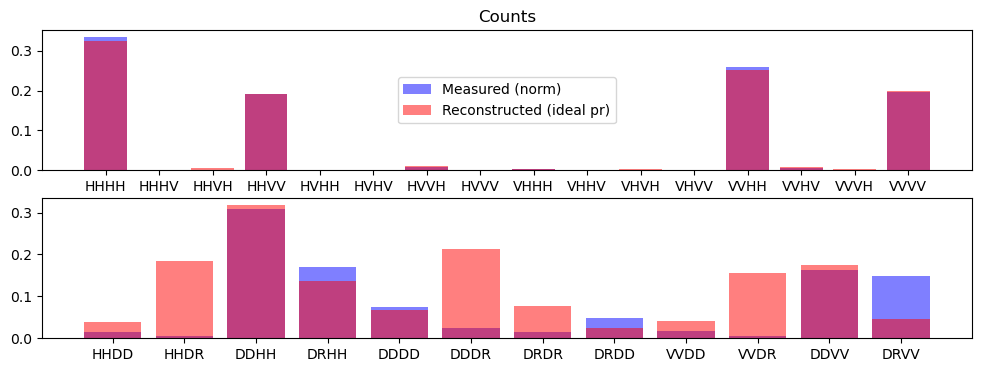

In [9]:
diag_name=np.array(['HHHH','HHHV','HHVH','HHVV','HVHH','HVHV','HVVH','HVVV','VHHH','VHHV','VHVH','VHVV','VVHH','VVHV','VVVH','VVVV'])

counts_ideal=np.zeros(N+len(proj_name), dtype=complex)
print(np.shape(counts_ideal))
fig, ax= plt.subplots(figsize=(12, 4), ncols=1, nrows=2)
for d in range(len(diag_name)):
    print(diag_name[d])
    Pr_ideal=prj.extended_projector_from_string(diag_name[d])
    # print(Pr_ideal)
    counts_ideal1=np.matmul(rho_rec,Pr_ideal.conj().T)
    counts_ideal[d]=np.matmul(Pr_ideal,counts_ideal1)
    print(counts_ideal[d], diag_coinc_arr[d]/np.sum(diag_coinc_arr))

ax[0].bar(diag_name,diag_coinc_arr/np.sum(diag_coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
ax[0].bar(diag_name,counts_ideal[:N], label='Reconstructed (ideal pr)', color='red', alpha=0.5)
ax[0].set_title("Counts")
ax[0].legend(loc='center')

for d in range(len(proj_name)):
    print(proj_name[d])
    Pr_ideal=prj.extended_projector_from_string(proj_name[d])
    # print(Pr_ideal)
    counts_ideal1=np.matmul(rho_rec,Pr_ideal.conj().T)
    counts_ideal[d+N]=np.matmul(Pr_ideal,counts_ideal1)
    print(counts_ideal[d+N], coinc_arr[d]/np.sum(coinc_arr))

ax[1].bar(proj_name,coinc_arr/np.sum(coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
ax[1].bar(proj_name,counts_ideal[N:], label='Reconstructed (ideal pr)', color='red', alpha=0.5)
# ax[1].set_title("Projectors' counts")
# ax[1].legend()

    

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


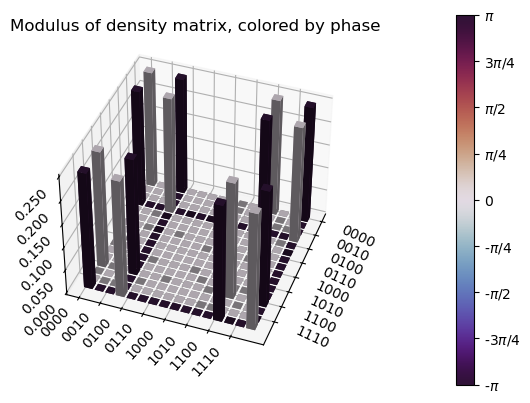

0.8408027704687266
0.9691238126827018


In [10]:
## Ideal density matrix

psi_true=np.zeros(N)
psi_true[0]=1/2
psi_true[3]=-1/2
psi_true[12]=1/2
psi_true[15]=-1/2
rho_true=np.outer(psi_true,psi_true)

dmt.plot_density_matrix_3D(rho_true)

f=dmt.fidelity(rho_rec,rho_true)
print(f)
pur=dmt.purity(rho_rec)
print(pur)

## Definition of the set-up matrixes

3. Now let's set our real projectors...

TO be considered:
- losses -> coefficients in the matrixes to be specified from calibration measurement
- post selection factors -> already taken into account by the tb and fb matrixes


In [42]:
def W_tb_si_func(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l):
    W=np.zeros([4,4], dtype=np.complex128)
    W[0,0]=Css*np.exp((phs_s+phi_s)*1.0j)
    W[1,0]=Csl*np.exp((phs_s+phi_l)*1.0j)
    W[2,0]=Cls*np.exp((phs_l+phi_s)*1.0j)
    W[3,0]=Cll*np.exp((phs_l+phi_l)*1.0j)
    W[1,1]= W[0,0]
    W[2,2]= W[0,0]
    W[3,3]= W[0,0]
    W[3,1]= W[2,0]
    W[3,2]= W[1,0]
    
    return W

def W_fb_func(J_1, J0, J1, theta):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0] = J0
    W[1,1] = W[0,0]
    W[0,1] = J1*np.exp(theta*1.0j)
    W[1,0] = -J_1*np.exp(-theta*1.0j)

    return W

def W_fb_si_func(J_1_s, J0_s, J1_s, ph_s, J_1_i, J0_i, J1_i, ph_i):
    W_s=W_fb_func(J_1_s, J0_s, J1_s, ph_s)
    W_i=W_fb_func(J_1_i, J0_i, J1_i, ph_i)
    W=np.kron(W_s,W_i) 

    return W


In [13]:
## try if the matrixes work

# W_tb_si(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l)
W_tb_si=W_tb_si_func(1.42732558, 1.20348837, 1.2005814, 1.0, 0, 0, 0.0, np.pi/2)
print(W_tb_si)

# W_fb_si(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
W_fb_si=W_fb_si_func(1,1,1,0,1,1,1,0)
print(W_fb_si)

Wexp=np.kron(W_tb_si,W_fb_si)
print(Wexp)

[[1.42732558e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [7.36924090e-17+1.20348837j 1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.20058140e+00+0.j         0.00000000e+00+0.j
  1.42732558e+00+0.j         0.00000000e+00+0.j        ]
 [6.12323400e-17+1.j         1.20058140e+00+0.j
  7.36924090e-17+1.20348837j 1.42732558e+00+0.j        ]]
[[1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j 1.+0.j 1.+0.j]]
[[1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e+00+0.j         1.42732558e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [1.42732558e+00+0.j         1.42732558e+00+0.j
  1.42732558e

## Real projectors definition 

Projector_real = matrix_real * base_vect

Ideal proj diag:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [1.19470732+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
Ideal proj diag:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.        +0.j 1.19470732+0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
Ideal proj diag:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Exp proj daig:  [0.        +0.j 0.        +0.j 1.19470732+0.j 0.        +0.j
 0

C:\Users\sc266065\AppData\Local\Temp\ipykernel_14260\2169528836.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)


Base:  VVHH
Proj:  DRDR
Ideal proj:  [ 0.25+0.j    0.  +0.25j  0.25+0.j    0.  +0.25j  0.  +0.25j -0.25+0.j
  0.  +0.25j -0.25+0.j    0.25+0.j    0.  +0.25j  0.25+0.j    0.  +0.25j
  0.  +0.25j -0.25+0.j    0.  +0.25j -0.25+0.j  ]
Exp proj:  [-1.21215768e-06-3.30000000e-01j -3.30000000e-01+1.21215768e-06j
 -1.21215768e-06-3.30000000e-01j -3.30000000e-01+1.21215768e-06j
  3.61584450e-01+0.00000000e+00j  2.21406620e-17-3.61584450e-01j
  3.61584450e-01+0.00000000e+00j  2.21406620e-17-3.61584450e-01j
 -1.32978083e-06-3.62021938e-01j -3.62021938e-01+1.32978083e-06j
 -1.32978083e-06-3.62021938e-01j -3.62021938e-01+1.32978083e-06j
  3.94253416e-01+0.00000000e+00j  2.41410592e-17-3.94253416e-01j
  3.94253416e-01+0.00000000e+00j  2.41410592e-17-3.94253416e-01j]
Base:  VVHH
Proj:  DRDD
Ideal proj:  [0.25+0.j   0.25+0.j   0.25+0.j   0.25+0.j   0.  +0.25j 0.  +0.25j
 0.  +0.25j 0.  +0.25j 0.25+0.j   0.25+0.j   0.25+0.j   0.25+0.j
 0.  +0.25j 0.  +0.25j 0.  +0.25j 0.  +0.25j]
Exp proj:  [-1.2121576

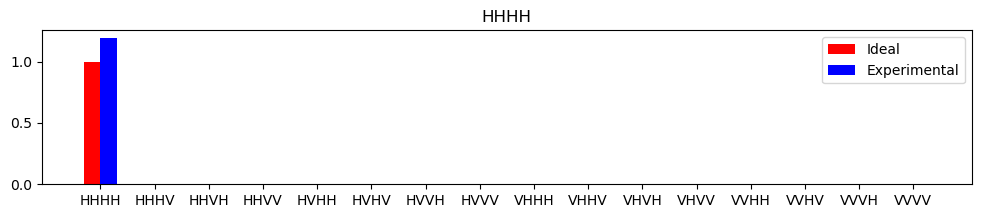

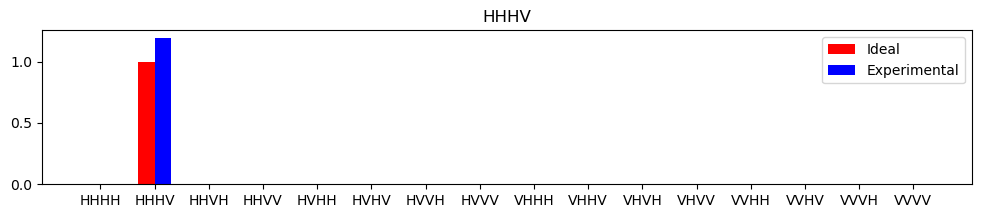

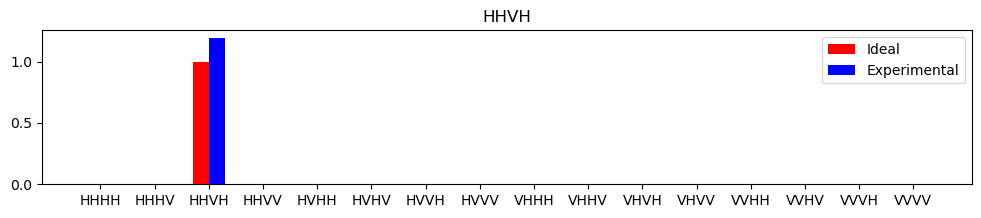

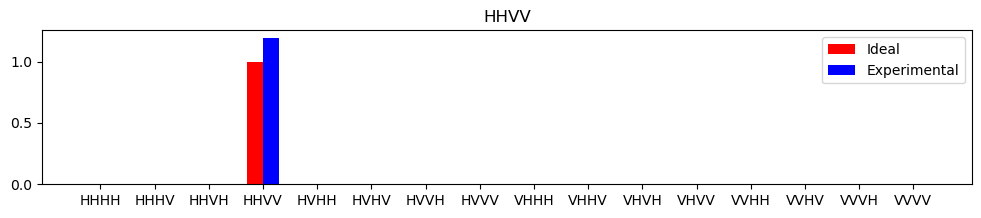

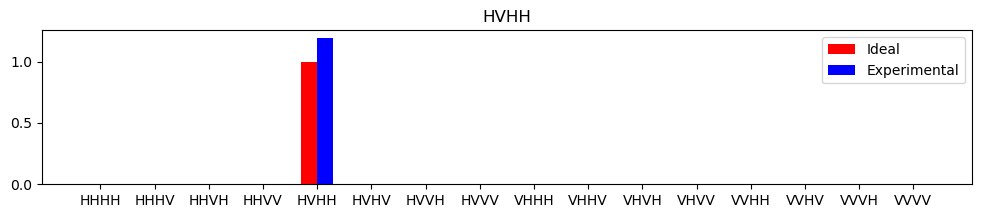

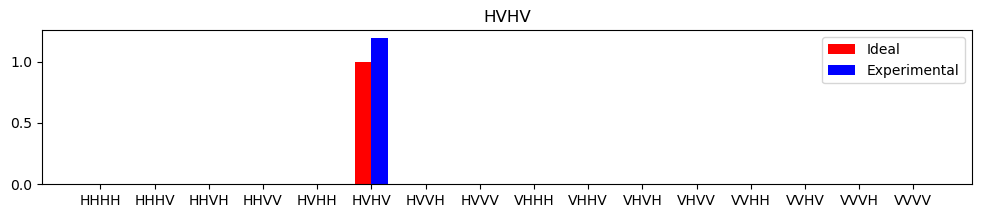

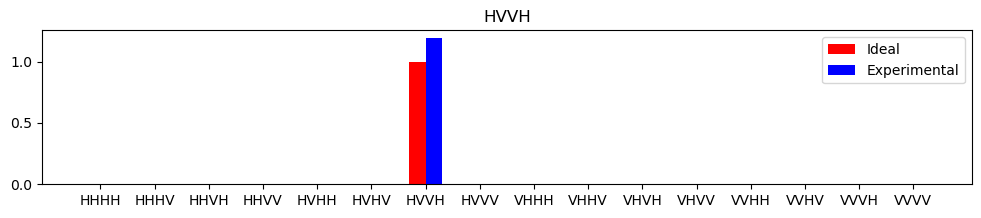

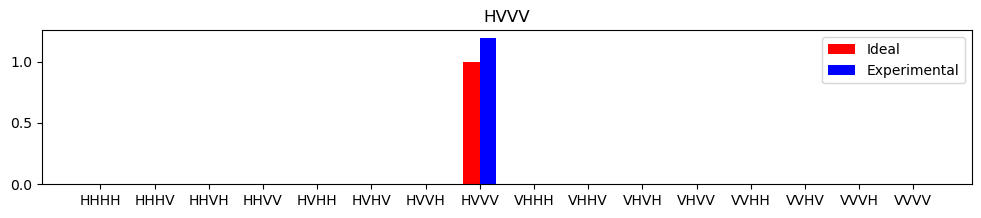

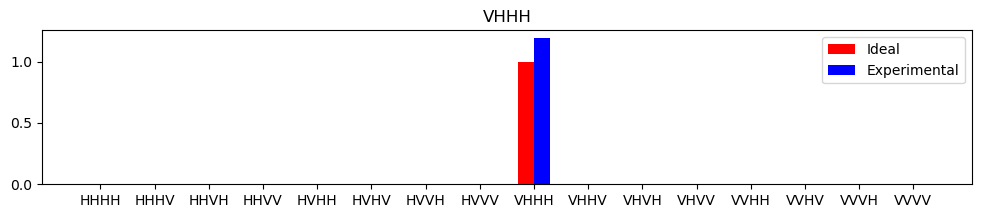

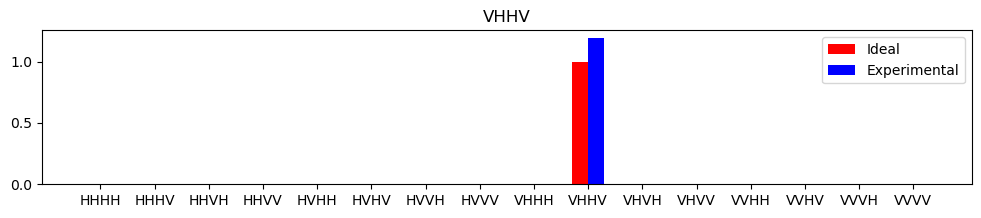

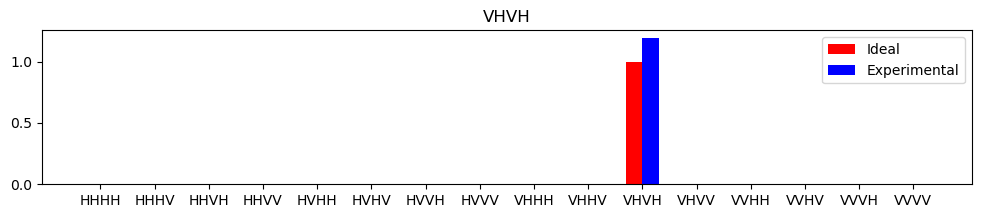

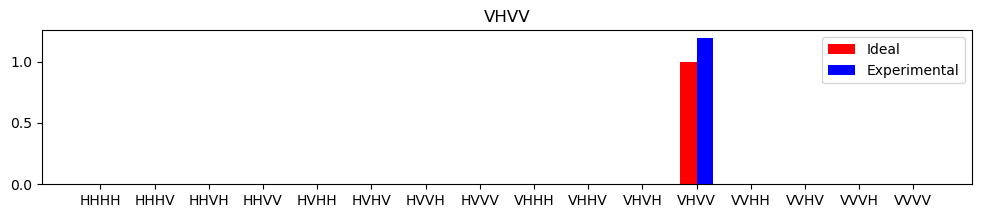

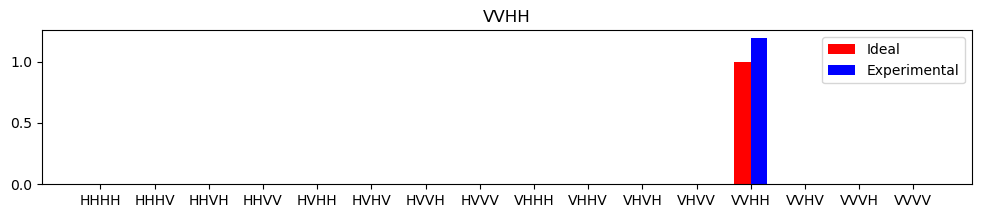

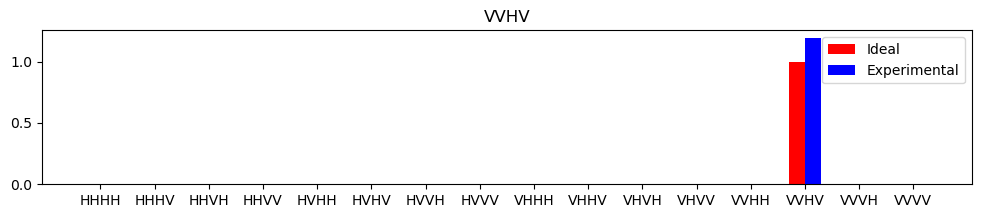

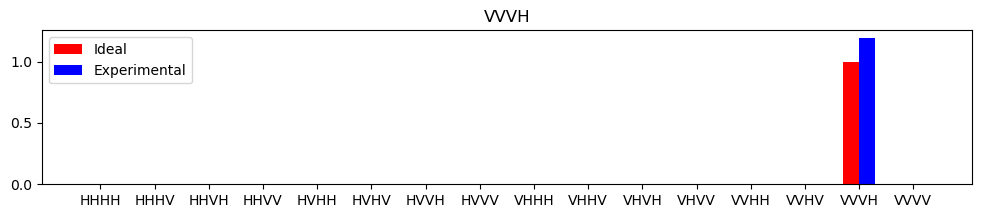

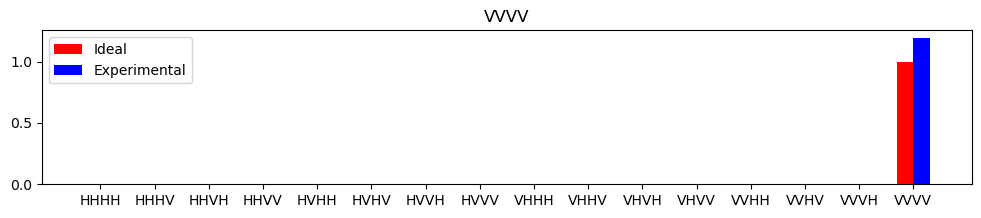

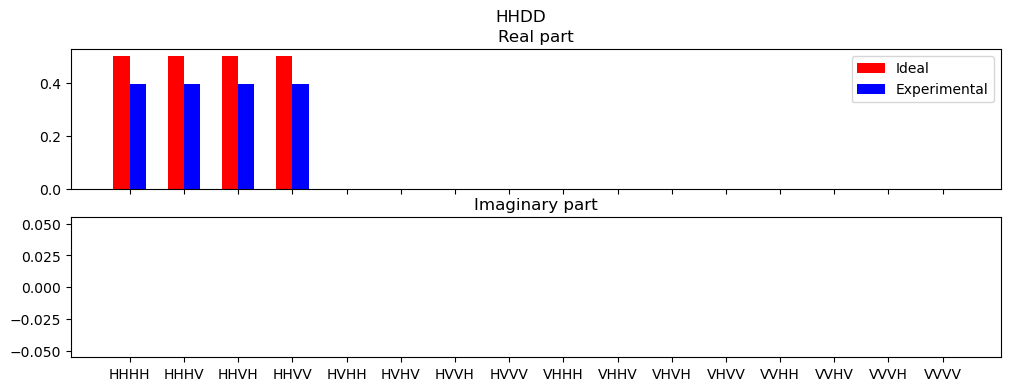

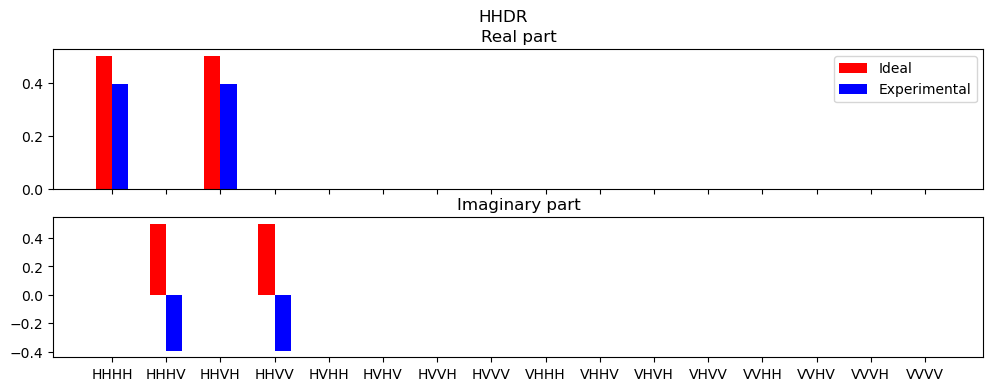

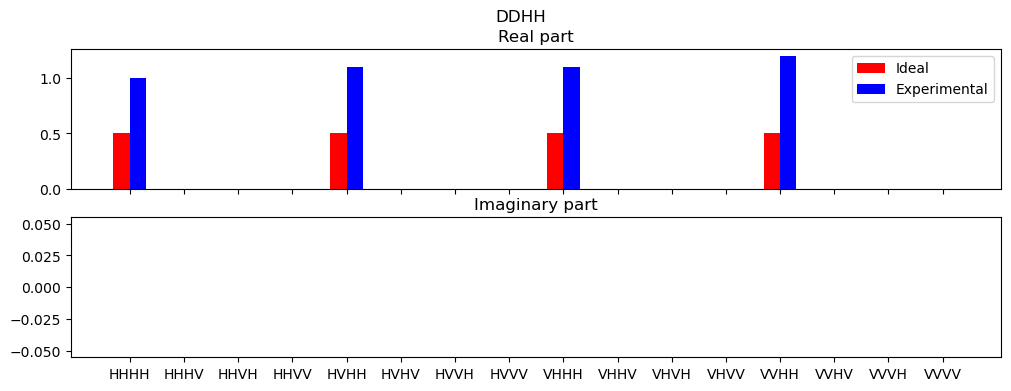

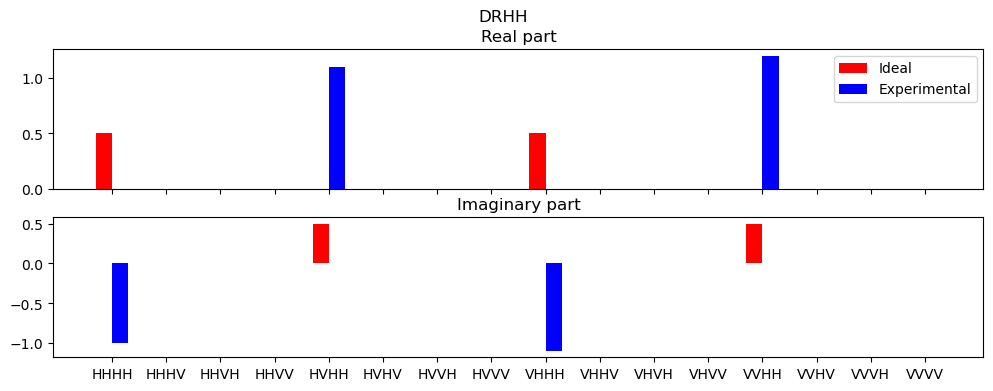

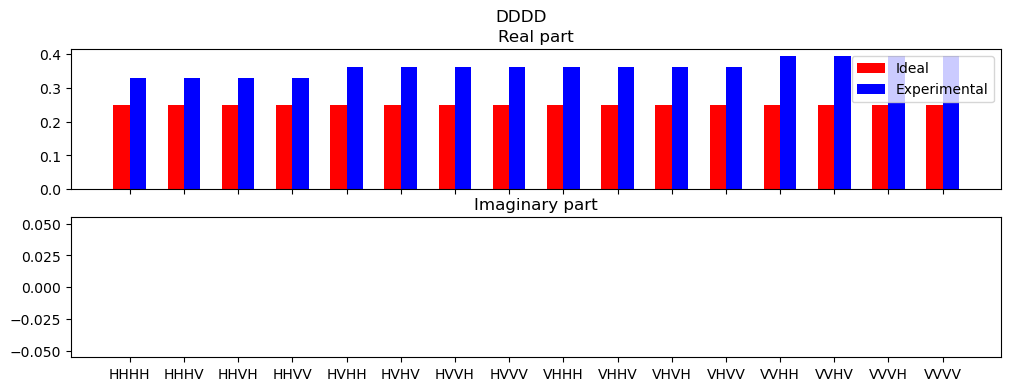

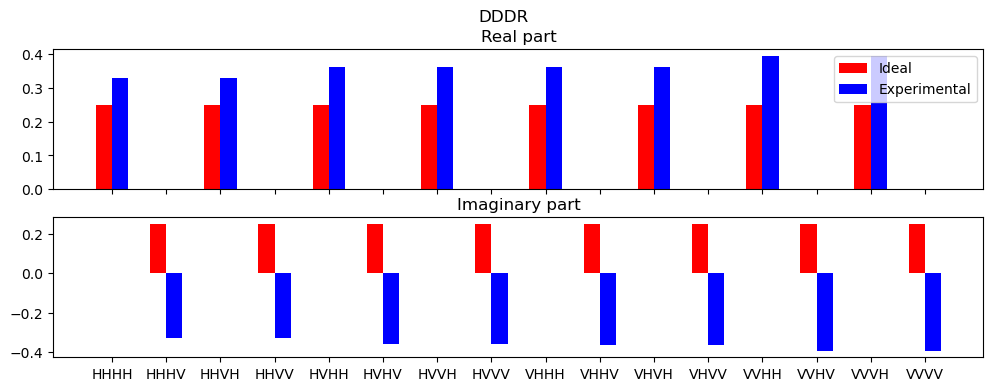

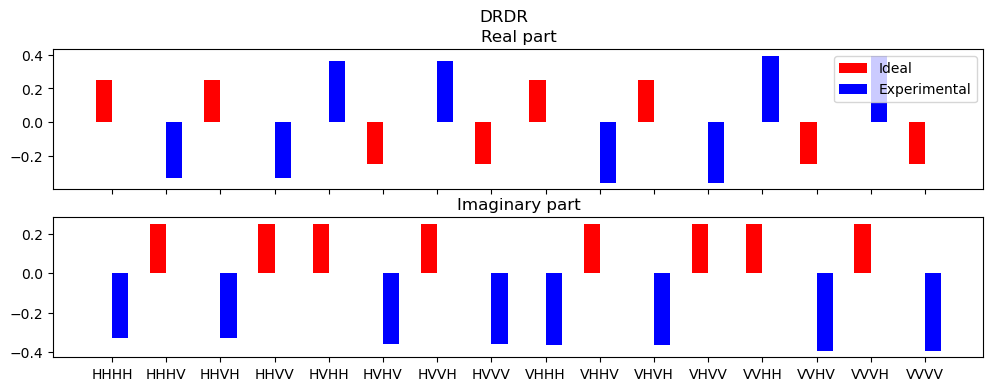

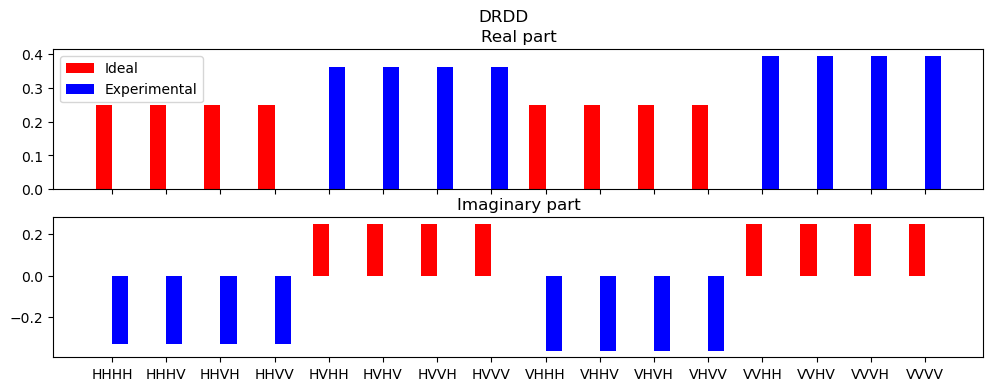

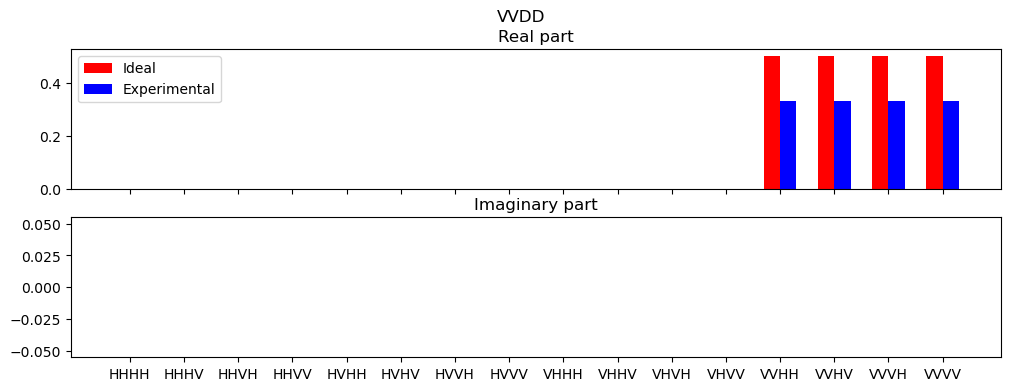

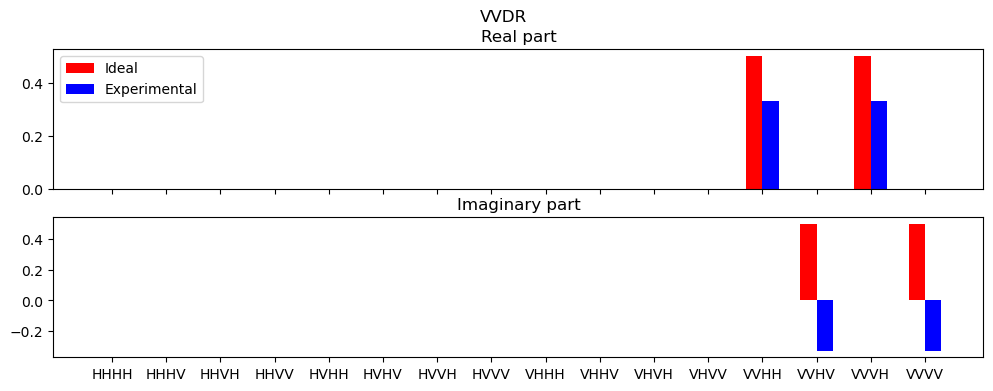

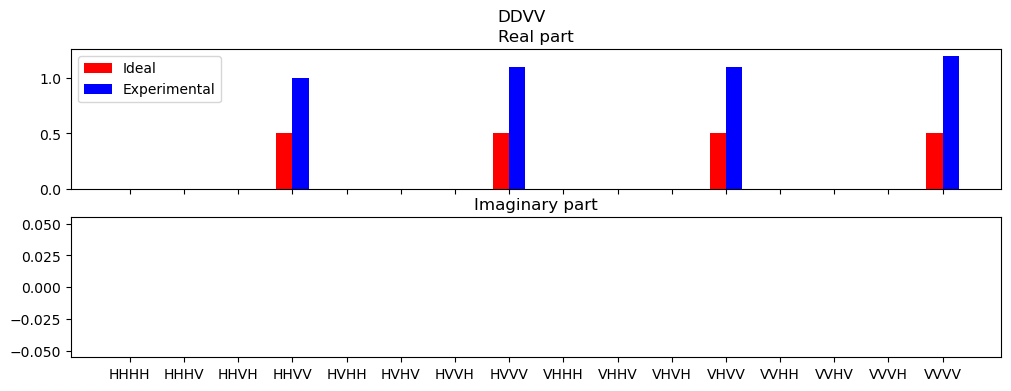

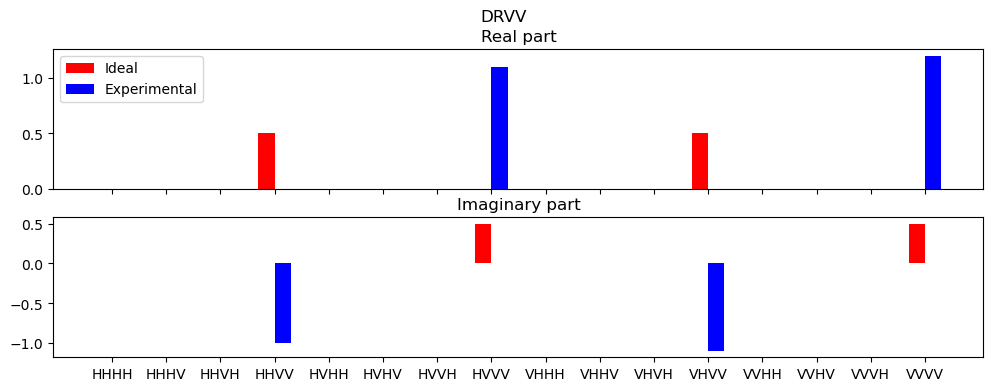

In [76]:
# 1.42732558 1.20348837 1.2005814  1.         file: 6Dic /Pin-3dBm_Phase0.0_300s_F2_1pLong


#Proj_dict[offd_projs[0]]['vect']
diag_name=np.array(['HHHH','HHHV','HHVH','HHVV','HVHH','HVHV','HVVH','HVVV','VHHH','VHHV','VHVH','VHVV','VVHH','VVHV','VVVH','VVVV'])
NbProj=len(offd_projs)
base = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj = np.zeros([NbProj+N,N], dtype=np.complex128)
Proj_exp = np.zeros([NbProj+N,N], dtype=np.complex128)
Coinc_exp = np.zeros([NbProj+N])

## from calibration
# C_arr = Css, Csl, Cls, Cll
C_arr=np.sqrt(np.array([1.42732558, 1.20348837, 1.2005814,  1.]))
# J_arr = J-1 s, J0 s, J+1 s, J-1 i, J0 i, J+1 i
J_arr=np.sqrt(np.array([0.33,0.33,0.33, 0.33,0.33,0.33]))

for i in range(N):
    ## DIAG, is measured with thelong arm of the MZI close, 
    # so no norm is needed. The phi-mod are also off (@output)

    Coinc_exp[i]=diag_coinc_arr[i] #/np.sum(diag_coinc_arr)
    base[i,:]=prj.extended_projector_from_string(diag_name[i])
    Proj[i,:]=prj.extended_projector_from_string(diag_name[i])
    # print(diag_name[i])

    ## FB, for the diagonal, the modulator @ output are OFF, both idler and signal
    J0=1.0
    J1=0.0
    J_1=0.0

    ## TB for the daigonal, the long-arm of the franson is blocked! ONLY SHORT
    Css=C_arr[0]
    Csl=0
    Cls=0
    Cll=0

    ## for each projector, define the matrix Wexp with the correct parameters
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,0,0)
    # print(W_tb_si)
    W_fb_si=W_fb_si_func(J_1,J0,J1,0.0, J_1,J0,J1,0.0)
    # print(W_fb_si)
    Wexp=np.kron(W_tb_si,W_fb_si)
    # proj_2=np.outer(Proj[i,:],Proj[i,:])
    # W=np.matmul(Wexp.conj().T,proj_2)
    Wexp_2=Wexp.conj().T
    Proj_exp[i,:]=np.matmul(Wexp_2,base[i,:])
    print('Ideal proj diag: ', Proj[i,:])
    print('Exp proj daig: ', Proj_exp[i,:])

    ## plot projector (diag)
    fig, ax= plt.subplots(figsize=(12, 2), ncols=1, nrows=1)
    X=np.linspace(1,N,N)
    width=0.3
    ax.set_title(diag_name[i])
    ax.bar(X-width/2,np.real(Proj[i,:]), label='Ideal', color='red', width=width)
    ax.bar(X+width/2,np.real(Proj_exp[i,:]), label='Experimental', color='blue', width=width)
    ax.set_xticks(X,diag_name)
    ax.legend()
   
print('Coinc diag: ', Coinc_exp)

for p in range(len(proj_name)):
    Css=C_arr[0]
    Csl=C_arr[1]
    Cls=C_arr[2]
    Cll=C_arr[3]

    if type_TB[p]==' ss':
        string_TB='HH'
    if type_TB[p]==' sl':
        string_TB='HV'
    if type_TB[p]==' ls':
        string_TB='VH'
    if type_TB[p]==' ll':
        string_TB='VV'

    if type_FB[p]==' 00':
        string_FB='HH'
    if type_FB[p]=='01':
        string_FB='HV'
    if type_FB[p]==' 10':
        string_FB='VS'
    if type_FB[p]==' 11':
        string_FB='VV'
    
    if proj_name[p][2:4]=='DD' or proj_name[p][2:4]=='DR' or proj_name[p][2:4]=='RD' or proj_name[p][2:4]=='RR':
        # print('superposition :', proj_name[p][2:4])
        W_fb_si=W_fb_si_func(J_arr[0],J_arr[1],J_arr[2],settings_FB[0,p],J_arr[3],J_arr[4],J_arr[5],settings_FB[1,p])
        # print(J_arr[0],J_arr[1],J_arr[2],settings_FB[0,p],J_arr[3],J_arr[4],J_arr[5],settings_FB[1,p])
        # print(W_fb_si)
        string_FB='HH'
    else:
        # print('not superposition :', proj_name[p][2:4])
        J0=1.0
        J1=0.0
        J_1=0.0
        W_fb_si=W_fb_si_func(J_1,J0,J1,settings_FB[0,p],J_1,J0,J1,settings_FB[1,p])

    
    if type_TB[p]==' 2l2l':
        print('2l2l case')
        string_TB='VV' 
        Css=C_arr[3]
        Csl=0
        Cls=0
        Cll=0 
        ## misuro i timestamp nello slot temporale '2l2l'
        ## i due fotoni hanno effettivamente fatto il long, ma è solo per comodità sperimentale
        ## 2 fotoni late fanno il long é equivalente a 2 fotoni late che arrivano nel time slot ll quando il braccio long é bloccato!
        ## la possibilità 2l2l non é presa in considerazione dalla matrice 4x4, ci vorrebbe la 6x6
        ## quindi
        # MISURA : 2 fotoni late che passano dal long
        # ANALISI : 2 fotoni late ('VV') passano dallo short col long bloccato, ma ci vogliono le perdite reali!


    pr=p+N
    base[pr,:]=prj.extended_projector_from_string(string_TB+string_FB)
    print('Base: ', string_TB+string_FB)
    # print(base[pr,:])
    ## for each projector, define the matrix Wexp with the correct parameters
    print('Proj: ', proj_name[p])

    # if settings_TB[3,p]==-1.0:
    #     settings_TB[3,p]=0.0

    
    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p])
    # print((Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p]))
    # print(W_tb_si)
    
    Wexp=np.kron(W_tb_si,W_fb_si)
    # print(Wexp)
    ######

    Proj[pr,:]=prj.extended_projector_from_string(proj_name[p])
    Wexp_2=Wexp.conj().T

    print('Ideal proj: ', Proj[pr,:])
    Coinc_exp[pr]=coinc_arr[p] #/np.sum(coinc_arr)
    Proj_exp[pr,:]=np.dot(Wexp_2,base[pr,:])
    print('Exp proj: ', Proj_exp[pr,:])

    ##plot projectors
    fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)

    X=np.linspace(1,N,N)
    width=0.3
    axr.bar(X-width/2,np.real(Proj[pr,:]), label='Ideal', color='red', width=width)
    axr.bar(X+width/2,np.real(Proj_exp[pr,:]), label='Experimental', color='blue', width=width)
    axr.set_title('Real part')
    axi.bar(X-width/2,np.imag(Proj[pr,:]), label='Ideal', color='red', width=width)
    axi.bar(X+width/2,np.imag(Proj_exp[pr,:]), label='Experimental', color='blue', width=width)
    axi.set_title('Imaginary part')
    fig.suptitle(proj_name[p])
    axi.set_xticks(X,diag_name)
    axr.legend()

# print(proj_name)
# print(Proj_exp)
print(Proj_exp.shape)

Ideal proj:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Base:  HHHH
Exp proj:  [0.39425342+0.j 0.39425342+0.j 0.39425342+0.j 0.39425342+0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
Ideal proj:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Base:  HHHH
Exp proj:  [3.94253416e-01+0.j         2.41410592e-17-0.39425342j
 3.94253416e-01+0.j         2.41410592e-17-0.39425342j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j        ]
Ideal proj:  [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+

IndexError: index 12 is out of bounds for axis 0 with size 12

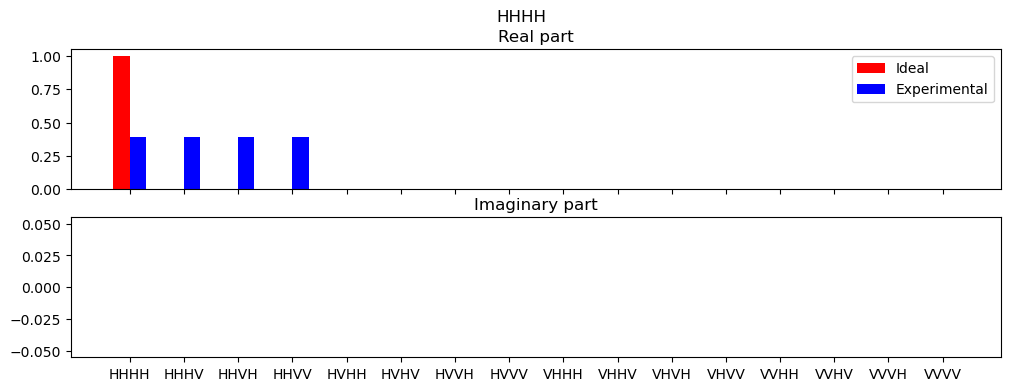

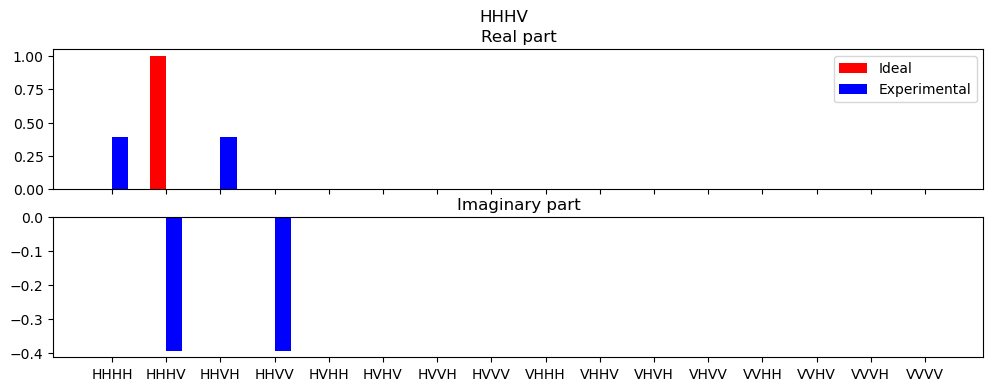

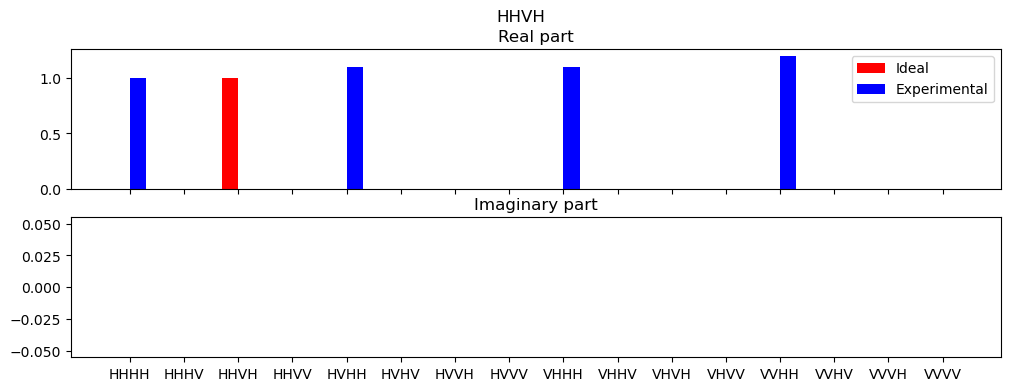

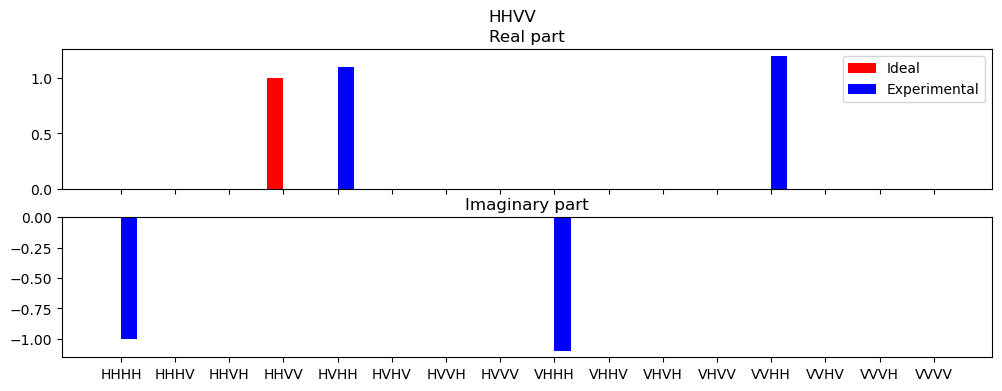

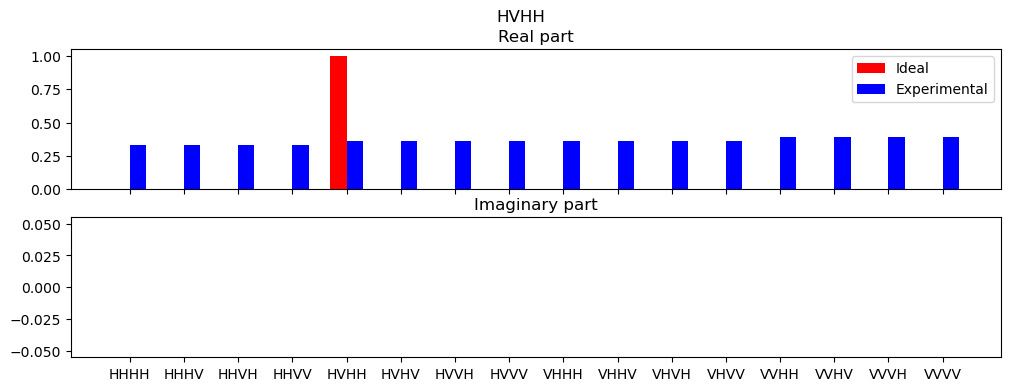

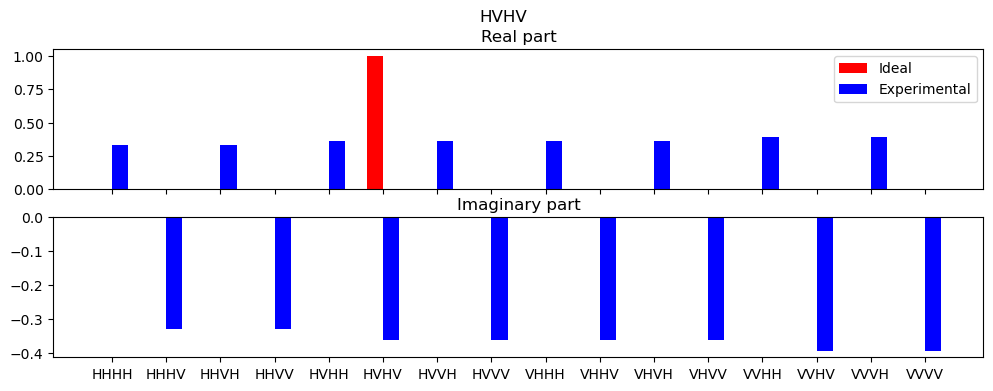

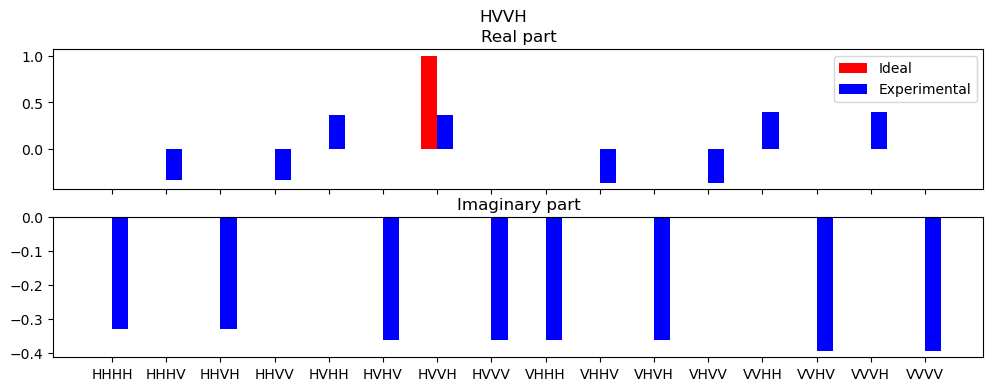

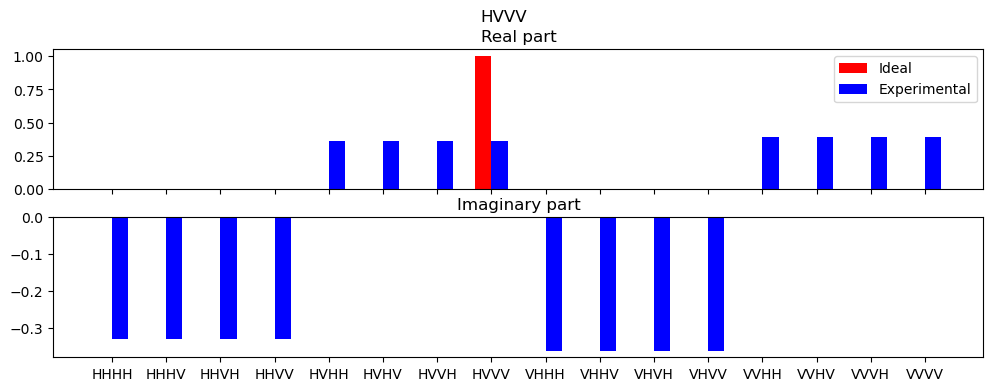

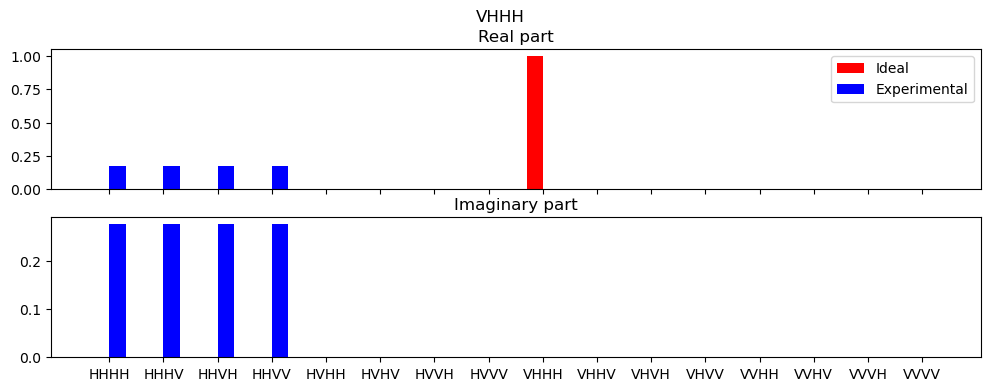

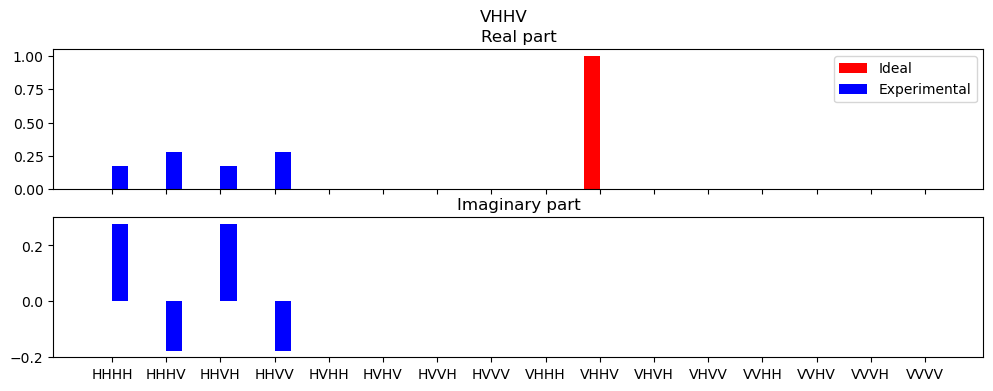

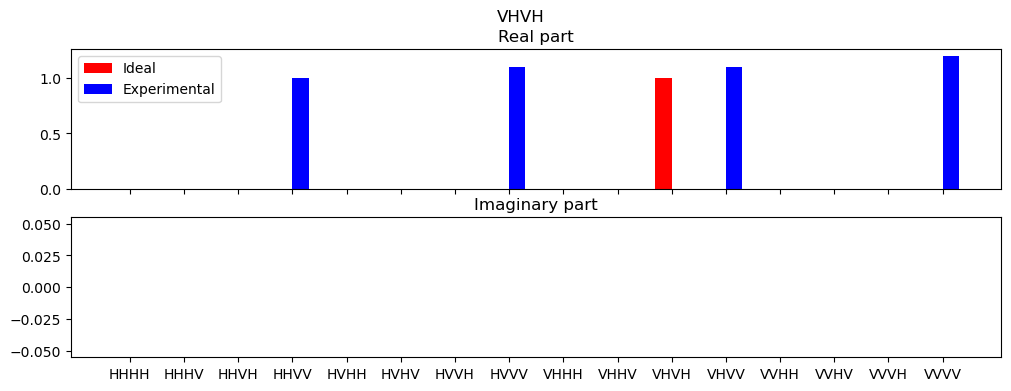

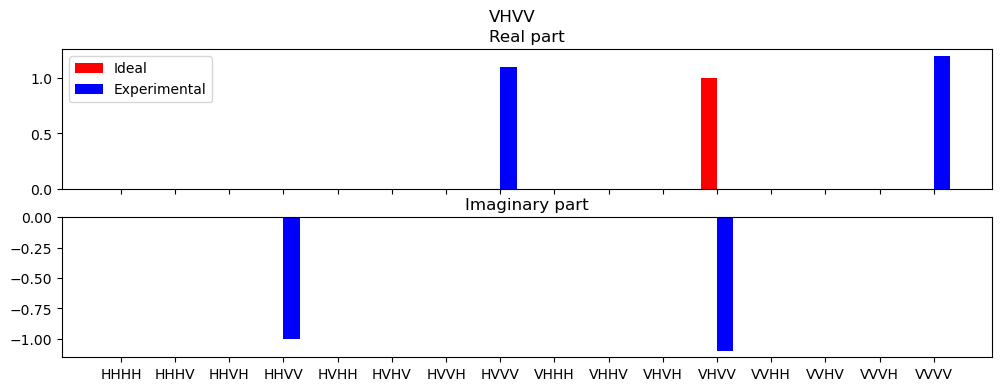

In [60]:
# 1.42732558 1.20348837 1.2005814  1.         file: 6Dic /Pin-3dBm_Phase0.0_300s_F2_1pLong


#Proj_dict[offd_projs[0]]['vect']
diag_name=np.array(['HHHH','HHHV','HHVH','HHVV','HVHH','HVHV','HVVH','HVVV','VHHH','VHHV','VHVH','VHVV','VVHH','VVHV','VVVH','VVVV'])
all_proj_name=np.append(diag_name,proj_name)
NbProj=len(all_proj_name)
base = np.zeros([NbProj,N], dtype=np.complex128)
Proj_ideal = np.zeros([NbProj,N], dtype=np.complex128)
Proj_exp = np.zeros([NbProj,N], dtype=np.complex128)
all_coinc_exp = np.append(diag_coinc_arr,coinc_arr)

## from calibration
# C_arr = Css, Csl, Cls, Cll
C_arr=np.sqrt(np.array([1.42732558, 1.20348837, 1.2005814,  1.]))
# J_arr = J-1 s, J0 s, J+1 s, J-1 i, J0 i, J+1 i
J_arr=np.sqrt(np.array([0.33,0.33,0.33, 0.33,0.33,0.33]))

for p in range(NbProj):

    ##ideal projector, corresponding to its name
    Proj_ideal[p,:]=prj.extended_projector_from_string(all_proj_name[p])
    print('Ideal proj: ', Proj_ideal[p,:])

    ##building the real projectors
    Css=C_arr[0]
    Csl=C_arr[1]
    Cls=C_arr[2]
    Cll=C_arr[3]

    if type_TB[p]==' ss':
        string_TB='HH'
    if type_TB[p]==' sl':
        string_TB='HV'
    if type_TB[p]==' ls':
        string_TB='VH'
    if type_TB[p]==' ll':
        string_TB='VV'
    if type_TB[p]==' 00':
        string_TB='HH'
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0
    if type_TB[p]==' 01':
        string_TB='HV'
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0
    if type_TB[p]==' 10':
        string_TB='VS'
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0
    if type_TB[p]==' 11':
        string_TB='VV'
        Css=C_arr[0]
        Csl=0
        Cls=0
        Cll=0
    

    if type_FB[p]==' 00':
        string_FB='HH'
    if type_FB[p]==' 01':
        string_FB='HV'
    if type_FB[p]==' 10':
        string_FB='VS'
    if type_FB[p]==' 11':
        string_FB='VV'
    
    if proj_name[p][2:4]=='DD' or proj_name[p][2:4]=='DR' or proj_name[p][2:4]=='RD' or proj_name[p][2:4]=='RR':
        # print('superposition :', proj_name[p][2:4])
        W_fb_si=W_fb_si_func(J_arr[0],J_arr[1],J_arr[2],settings_FB[0,p],J_arr[3],J_arr[4],J_arr[5],settings_FB[1,p])
        # print(J_arr[0],J_arr[1],J_arr[2],settings_FB[0,p],J_arr[3],J_arr[4],J_arr[5],settings_FB[1,p])
        # print(W_fb_si)
        string_FB='HH'
    else:
        # print('not superposition :', proj_name[p][2:4])
        J0=1.0
        J1=0.0
        J_1=0.0
        W_fb_si=W_fb_si_func(J_1,J0,J1,settings_FB[0,p],J_1,J0,J1,settings_FB[1,p])

    if type_TB[p]==' 2l2l':
        print('2l2l case')
        string_TB='VV'
        Css=0
        Csl=0
        Cls=0
        Cll=C_arr[3]


    base[p,:]=prj.extended_projector_from_string(string_TB+string_FB)
    print('Base: ', string_TB+string_FB)

    W_tb_si=W_tb_si_func(Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p])
    # print((Css,Csl,Cls,Cll,0,0,settings_TB[2,p],settings_TB[3,p]))
    # print(W_tb_si)
    
    Wexp=np.kron(W_tb_si,W_fb_si)
    Wexp_2=Wexp.conj().T
    Proj_exp[p,:]=np.dot(Wexp_2,base[p,:])
    print('Exp proj: ', Proj_exp[p,:])

    ##plot projectors
    fig, (axr,axi)= plt.subplots(figsize=(12, 4), ncols=1, nrows=2, sharex=True)

    X=np.linspace(1,N,N)
    width=0.3
    axr.bar(X-width/2,np.real(Proj_ideal[p,:]), label='Ideal', color='red', width=width)
    axr.bar(X+width/2,np.real(Proj_exp[p,:]), label='Experimental', color='blue', width=width)
    axr.set_title('Real part')
    axi.bar(X-width/2,np.imag(Proj_ideal[p,:]), label='Ideal', color='red', width=width)
    axi.bar(X+width/2,np.imag(Proj_exp[p,:]), label='Experimental', color='blue', width=width)
    axi.set_title('Imaginary part')
    fig.suptitle(all_proj_name[p])
    axi.set_xticks(X,diag_name)
    axr.legend()
   
print('Coinc diag: ', all_coinc_exp)
# print(proj_name)
# print(Proj_exp)
# print(Proj_exp.shape)

In [58]:
print('Ideal proj: ', len(Proj_ideal[p,:]))


Ideal proj:  16


In [53]:
all_coinc_exp

array([276.,   0.,   1., 157.,   0.,   0.,   7.,   0.,   2.,   0.,   1.,
         0., 214.,   5.,   0., 162.,  50.,  20., 982., 544., 238.,  77.,
        50., 152.,  55.,  18., 521., 472.])

## Density matrix (final)

The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


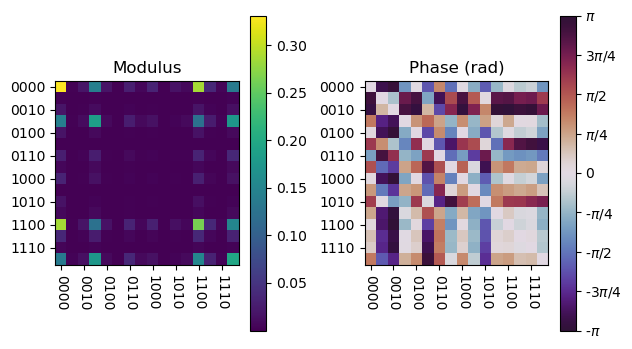

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


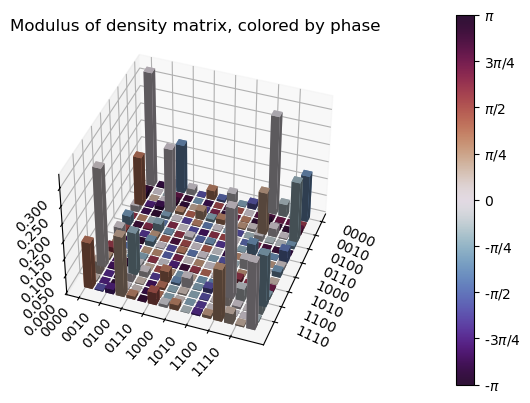

Fidelity:  0.557845010667167
Purity:  0.6588799930301861


In [77]:
tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp)
# rho_rec = tomo.get_density_matrix(Proj_exp, Coinc_exp/np.sum(diag_coinc_arr))

dmt.plot_density_matrix_2D(rho_rec)
dmt.plot_density_matrix_3D(rho_rec)

f=dmt.fidelity(rho_rec,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec)
print('Purity: ', pur)

(28,)


C:\Users\sc266065\AppData\Local\Temp\ipykernel_14260\1468355808.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts_rec[d]=np.matmul(a.conj().T,counts_rec1)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


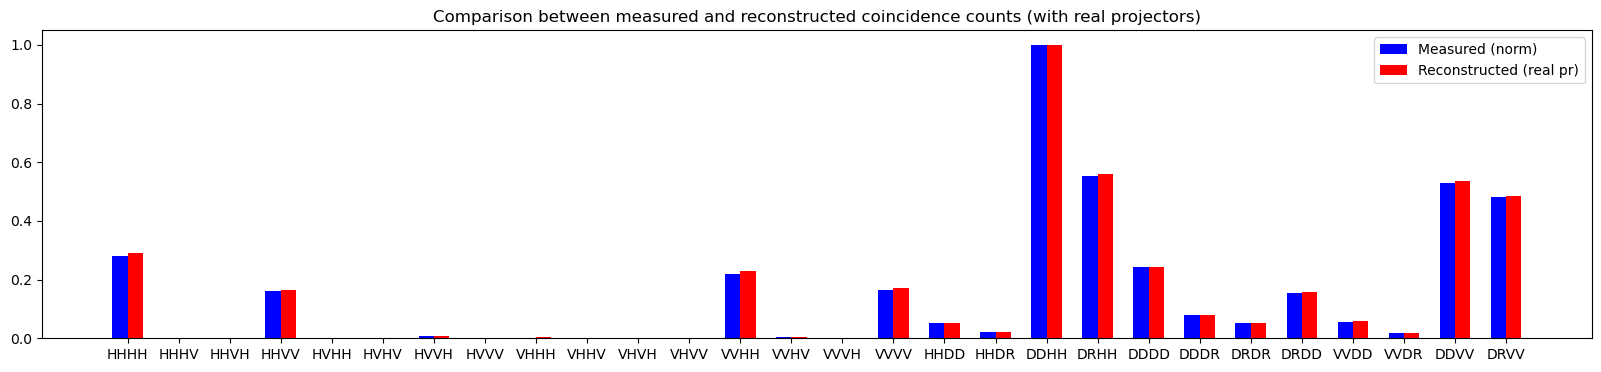

In [66]:
counts_rec=np.zeros(N+len(proj_name), dtype=complex)
print(np.shape(counts_rec))

## Proj_exp, Coinc_exp

fig, ax= plt.subplots(figsize=(20, 4), ncols=1, nrows=1)
for d in range(len(Proj_exp)):
    # print(diag_name[d])
    a=Proj_exp[d].reshape(16,1)
    # print(np.shape(a))

    counts_rec1=np.matmul(rho_rec,a)
    # print(counts_ideal1)
    counts_rec[d]=np.matmul(a.conj().T,counts_rec1)
    # print(counts_rec[d], Coinc_exp[d])

X=np.linspace(1,len(np.append(diag_name,proj_name)),len(np.append(diag_name,proj_name)))
width=0.3
ax.bar(X-width/2,Coinc_exp/np.max(Coinc_exp), label='Measured (norm)', color='blue', width=width)
ax.bar(X+width/2,counts_rec/np.max(counts_rec), label='Reconstructed (real pr)', color='red', width=width)
ax.set_xticks(X,np.append(diag_name,proj_name))
ax.set_title("Comparison between measured and reconstructed coincidence counts (with real projectors)")
ax.legend(loc='best')

# ax[1].bar(proj_name,coinc_arr/np.sum(coinc_arr), label='Measured (norm)', color='blue', alpha=0.5)
# ax[1].bar(proj_name,counts_ideal[N:], label='Reconstructed (ideal pr)', color='red', alpha=0.5)
# ax[1].set_title("Projectors' counts")
# ax[1].legend()

    

### Density matrix with ideal projectors

The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2, 2] using Triangular model with 256 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


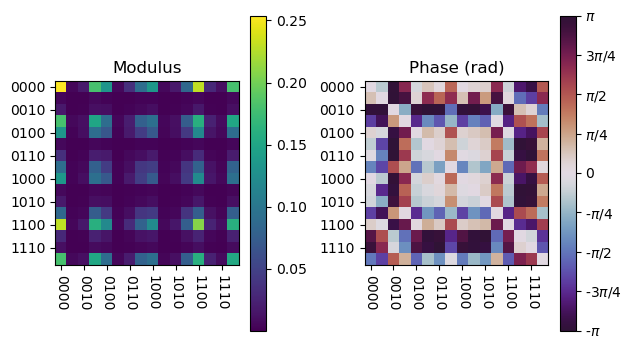

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


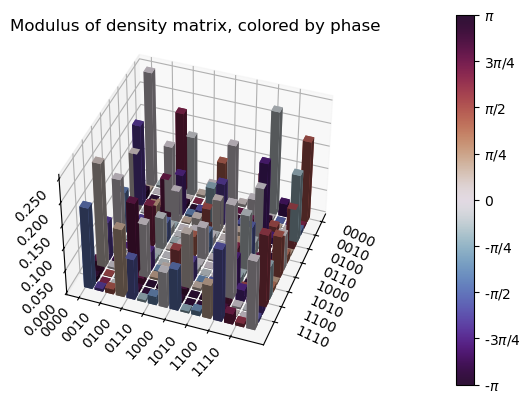

Fidelity:  0.7010964351219349
Purity:  0.900694413244851


C:\Users\sc266065\AppData\Local\Temp\ipykernel_14260\2103741625.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  counts_rec[d]=np.matmul(a.conj().T,counts_rec1)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


c:\Users\sc266065\AppData\Local\miniforge3\Lib\site-packages\matplotlib\transforms.py:767: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


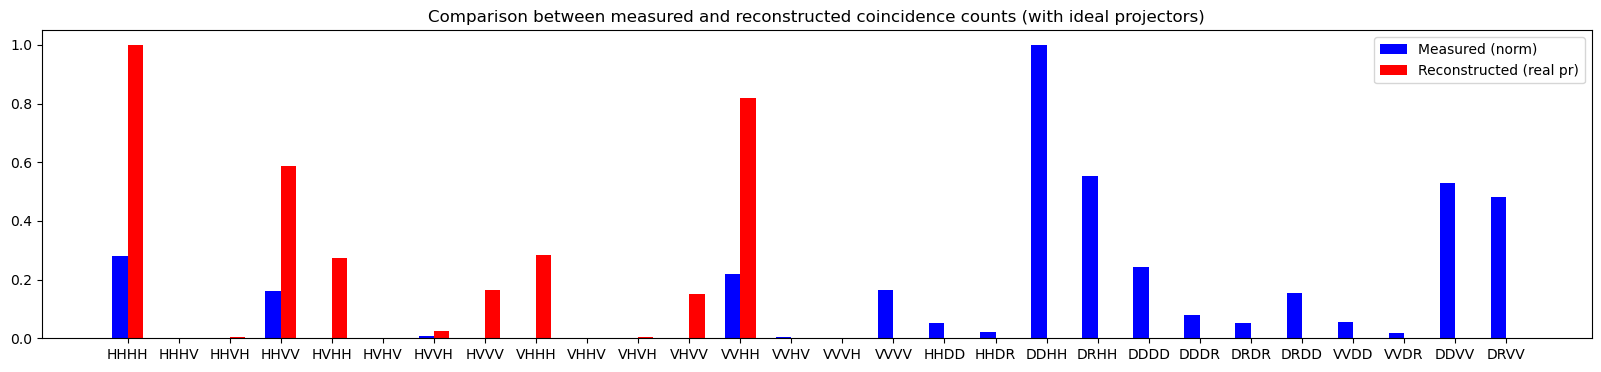

In [67]:
tomo.set_density_matrix_model(model_triangular)

rho_rec_ideal = tomo.get_density_matrix(Proj, Coinc_exp)

dmt.plot_density_matrix_2D(rho_rec_ideal)
dmt.plot_density_matrix_3D(rho_rec_ideal)

f=dmt.fidelity(rho_rec_ideal,rho_true)
print('Fidelity: ', f)
pur=dmt.purity(rho_rec_ideal)
print('Purity: ', pur)


### 

fig, ax= plt.subplots(figsize=(20, 4), ncols=1, nrows=1)
for d in range(len(Proj)):
    # print(diag_name[d])
    a=Proj_ideal[d].reshape(16,1)
    # print(np.shape(a))

    counts_rec1=np.matmul(rho_rec_ideal,a)
    # print(counts_ideal1)
    counts_rec[d]=np.matmul(a.conj().T,counts_rec1)
    # print(counts_rec[d], Coinc_exp[d])

X=np.linspace(1,len(np.append(diag_name,proj_name)),len(np.append(diag_name,proj_name)))
width=0.3
ax.bar(X-width/2,Coinc_exp/np.max(Coinc_exp), label='Measured (norm)', color='blue', width=width)
ax.bar(X+width/2,counts_rec/np.max(counts_rec), label='Reconstructed (real pr)', color='red', width=width)
ax.set_xticks(X,np.append(diag_name,proj_name))
ax.set_title("Comparison between measured and reconstructed coincidence counts (with ideal projectors)")
ax.legend(loc='best')
    